In [215]:
import seaborn as sns
import numpy as np
import pandas as pd
import os
import tabula
import re
import matplotlib.pyplot as plt
import PyPDF2


## Check Data.
- [x] number of subjects
- [x] number of Risk
- [x] number Amb
- [x] number MC's

In [216]:
risk_files = [os.path.join(root,f) for root,dirs,files in os.walk('../data') for f in files if 'risk' in f]
amb_files = [os.path.join(root,f) for root,dirs,files in os.walk('../data') for f in files if 'ambig' in f]
MC_files= [os.path.join(root,f) for root,dirs,files in os.walk('../data') for f in files if 'Check' in f]
print("Number of Subjects:%s \n Number of Risk Files:%s \n Number of Amb Files:%s \n Number of MC Files:%s \n"%(
len(os.listdir('../data')),len(risk_files),len(amb_files),len(MC_files)))

Number of Subjects:28 
 Number of Risk Files:28 
 Number of Amb Files:25 
 Number of MC Files:27 



## Manipulation Check:
- [ ] do participants increase preference in the risk task for "better" probabilities?
- [ ] are participants generally risk averse?
- [ ] do participants report the different 2nd order distributions?
- [ ] are participants generally ambiguity averse? 

In [217]:
########### Make Risk DF ########
df_list=[]# prepend list
for f in risk_files:
    sub="sub-%s"%(re.search("sub-(.*)/",f).group(1))
    df=pd.read_csv(f)
    df['sub']=sub
    df_list.append(df) #append this list w/ a df with 'sub' column
df_r=pd.concat(df_list) #concatonate the list to a single df
df_r=df_r[df_r.response!= 'no_response']#only analyzing responses made

#define whether they chose safe or lottery
df_r['Choose_lot']=np.logical_or((np.logical_and(df_r.LotisLeft==1,df_r.response=="['f']")),
(np.logical_and(df_r.LotisLeft==0,df_r.response=="['j']")))

############ Make Ambiguity DF ########
df_list=[]# prepend list
for f in amb_files:
    sub="sub-%s"%(re.search("sub-(.*)/",f).group(1))
    df=pd.read_csv(f)
    df['sub']=sub
    df_list.append(df) #append this list w/ a df with 'sub' column
df_a=pd.concat(df_list) #concatonate the list to a single df
df_a=df_a[df_a.response!= 'No_resp']#only analyzing responses made

#define whether they chose safe or lottery
df_a['Choose_Risk']=np.logical_or((np.logical_and(df_a.RiskisLeft==1,df_a.response=="['f']")),
(np.logical_and(df_a.RiskisLeft==0,df_a.response=="['j']")))

#MC files#####


## Check items 1 & 2
- [x] Probability of choosing lottery increases with likeihood of winning
- [x] Participants are generally risk averse. (lot prize 13 sure prize 5) EV~38%

In [218]:
if 1==0:
    import warnings
    warnings.filterwarnings('ignore')
    plotData=df_r
    sns.lmplot(x='Lot_per',y='Choose_lot', data=plotData ,
               hue='sub',logistic=True,x_jitter=0.5,y_jitter=0.03)
    plt.plot([0,100], [0.5,0.5], linewidth=2,linestyle='dashed')
    plt.plot([38,38], [0,1], linewidth=2,linestyle='dashed')

## Manipulation Check:
- [ ] do participants report the different 2nd order distributions?
        Yes But I need to come back to this. figuring out the code is tough
- [x] are participants generally ambiguity averse? 
        Yes, but more mixed than risk 7 vs 2

,sub,best,worst,variable,value,color,percent
0,test,red,green,R_0,5,R,0
1,test,red,green,R_0,5,R,0
2,test,red,green,R_0,5,R,0
3,test,red,green,R_0,5,R,0
4,test,red,green,R_0,5,R,0
...,...,...,...,...,...,...,...
77,test,red,green,B_80,3,B,80
78,test,red,green,B_80,3,B,80
79,test,red,green,B_90,2,B,90
80,test,red,green,B_90,2,B,90


<AxesSubplot:xlabel='percent', ylabel='Probability'>

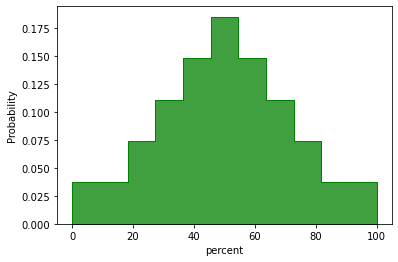

In [219]:
#with open('../data/sub-1013/1013_ManipulationCheck.pdf', 'rb') as f:
#for sub in
sub='test'
f = PyPDF2.PdfFileReader('../data/sub-%s/%s_ManipulationCheck.pdf'%(sub,sub))
ff = f.getFields()

columns=np.array(['sub','best','worst',
         'R_0','R_10','R_20','R_30','R_40','R_50','R_60','R_70','R_80','R_90','R_100',
         'G_0','G_10','G_20','G_30','G_40','G_50','G_60','G_70','G_80','G_90','G_100',
         'B_0','B_10','B_20','B_30','B_40','B_50','B_60','B_70','B_80','B_90','B_100',
         'Acc_0','Acc_10','Acc_20','Acc_30','Acc_40','Acc_50','Acc_60','Acc_70','Acc_80','Acc_90','Acc_100',
        'Y_0','Y_10','Y_20','Y_30','Y_40','Y_50','Y_60','Y_70','Y_80','Y_90','Y_100']).transpose()
data=[ff[i]['/V'] for i in ff]

df=pd.DataFrame(data=[data],columns=columns).melt(id_vars=['sub','best','worst'])
df['color'] = df.variable.str.split('_', expand = True)[0]
df['percent'] = pd.to_numeric(df.variable.str.split('_', expand = True)[1])
df.percent=df.percent.astype(int)
df['value']=df['value'].astype(int)
df=pd.DataFrame(df.values.repeat(df.value, axis=0), columns=df.columns)
df=df[df['color'].isin(['R','G','B'])]
df.percent=df.percent.apply(pd.to_numeric,errors='coerce')

display(df)
df=df[df['color']=='G']
sns.histplot(x='percent',data=df,color='Green',
             element='step',fill=True,bins=11,stat='probability')

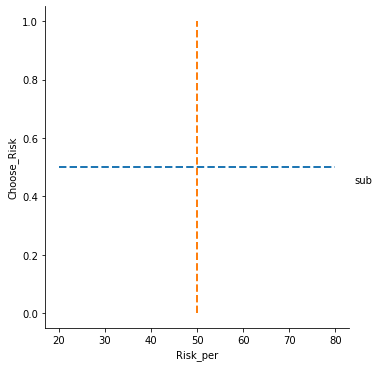

In [220]:
if 1==1:
    import warnings
    warnings.filterwarnings('ignore')
    plotData=df_a[df_a['dist']=='true_unkown'] # We need to get rid of the skew to make it fair
    
    sns.lmplot(x='Risk_per',y='Choose_Risk', data=plotData ,
               hue='sub',logistic=True,x_jitter=0.5,y_jitter=0.03)
    
    plt.plot([20,80], [0.5,0.5], linewidth=2,linestyle='dashed')
    plt.plot([50,50], [0,1], linewidth=2,linestyle='dashed')

# Axiom: Efficiently compound lotteries
- [ ] Do participants show aversion to second order variance in the 100% ambiguous case?
    Yes

In [ ]:
plotData=df_a[df_a['Amb']==100]
    
ax=sns.lmplot(x='Risk_per',y='Choose_Risk', data=plotData ,
           hue='dist',logistic=True,x_jitter=0.5,y_jitter=0.03,ci=68,legend=False)

plt.legend(title='Second Order Probability',bbox_to_anchor=(1.5,1),loc='lower right',
           labels=['Wide','Narrow','Skewed','Unknown'])

plt.title('Ambiguous vs Risky Lotteries')
plt.xlabel('Chance of Winning')
plt.ylabel('Chose Risky Lottery')

#ax.axhline(y=0.5,color='grey')
#ax.axvline(x=50,color='grey')

plt.plot([20,90], [0.5,0.5], linewidth=2,color='grey')
plt.plot([50,50], [0,1], linewidth=2,color='grey')

# Interaction:
- [ ] Is there an interaction between 2nd order variance and "Ambiguity"

    Yes Greater decrease for the wide than Narrow [x]
        Increase for the Skew [x]
        No change for the "True Unknown" [?]

In [226]:
df_a.dist.unique()

array(['wide', 'narrow', 'skew', 'True_unkown'], dtype=object)

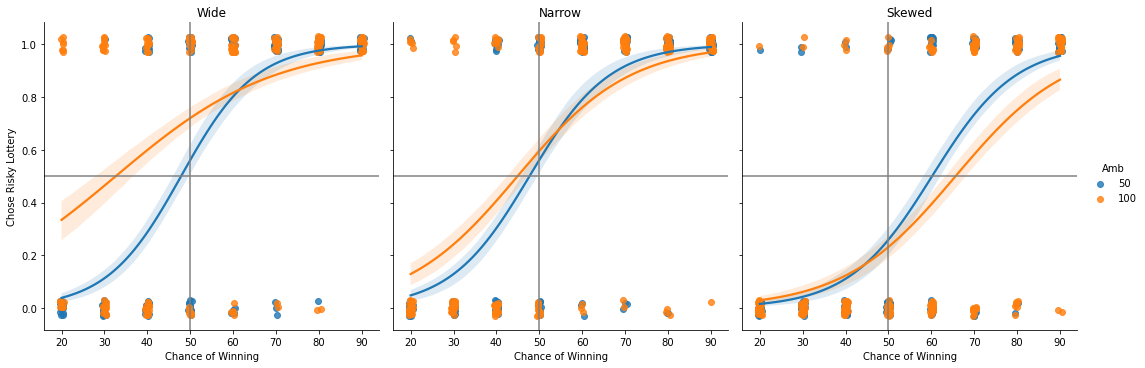

In [268]:
plotData=df_a[df_a['dist'].isin(['narrow','wide','skew'])]
    
graph=sns.lmplot(x='Risk_per',y='Choose_Risk', data=plotData ,
           hue='dist',logistic=True,x_jitter=0.5,y_jitter=0.03,
                 col="dist",ci=68)

titles=['Wide','Narrow','Skewed']
for i,a in enumerate(graph.axes[0]):
    if i==0:
        a.set_ylabel('Chose Risky Lottery')
    a.set_xlabel('Chance of Winning')
    a.set_title(titles[i])
    a.axhline(y=0.5,color='grey')
    a.axvline(x=50,color='grey')

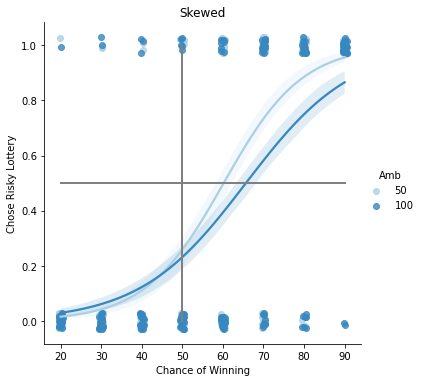

In [277]:
plotData=df_a[df_a['dist'].isin(['skew'])]
    
graph=sns.lmplot(x='Risk_per',y='Choose_Risk', data=plotData ,palette='Blues',
           hue='Amb',logistic=True,x_jitter=0.5,y_jitter=0.03,ci=68)

plt.title('Skewed')
plt.xlabel('Chance of Winning')
plt.ylabel('Chose Risky Lottery')

plt.plot([20,90], [0.5,0.5], linewidth=2,color='grey')
plt.plot([50,50], [0,1], linewidth=2,color='grey')

In [248]:
a._get_patches_for_fill(0)

<generator object _process_plot_var_args.__call__ at 0x7f3b501d87d0>

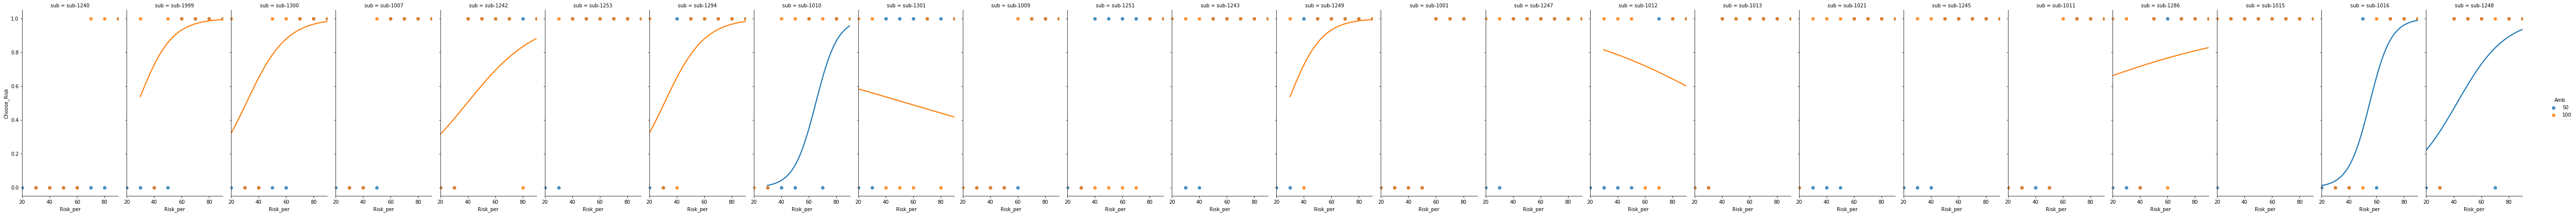

In [115]:
plotData=df_a[df_a['dist']=='wide']
    
graph=sns.lmplot(x='Risk_per',y='Choose_Risk', data=plotData,
           hue='Amb',logistic=True,col="sub", height=6, aspect=0.5,ci=95)

Risk_per  Money  RiskisLeft        RT
sub      dist        Amb Choose_Risk                                        
sub-1001 True_unkown 50  False        37.500000    8.0    1.000000  1.771521
                         True         66.666667    8.0    0.000000  1.941190
                     100 False        40.000000    8.0    0.800000  1.278489
                         True         75.000000    8.0    1.000000  1.438126
         narrow      50  False        44.000000    8.0    0.400000  1.448357
...                                         ...    ...         ...       ...
sub-1999 skew        100 True         65.000000   13.0    1.000000  0.807548
         wide        50  False        35.000000   13.0    0.750000  1.279024
                         True         75.000000   13.0    0.500000  1.080631
                     100 False        40.000000   13.0    1.000000  2.682984
                         True         63.333333   13.0    0.666667  1.752537

[378 rows x 4 columns]

<AxesSubplot:xlabel='dist', ylabel='Risk_per'>

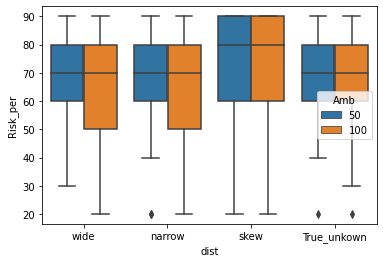

In [9]:
display(df_a.groupby(by=["sub","dist","Amb","Choose_Risk"]).mean())
plot_df=df_a[df_a['Choose_Risk']==True]
sns.boxplot(x='dist',y="Risk_per",hue='Amb',data=plot_df)

In [10]:
eq_df=[]
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model

clf=linear_model.LogisticRegression(penalty='l2',C=10000000,solver='liblinear')

for sub in df_a['sub'].unique():
    for amb in df_a['Amb'].unique():
        for dist in df_a['dist'].unique():
            df_reg=df_a[(df_a['sub']==sub)&(df_a['Amb']==amb)&(df_a['dist']==dist)]
            X=np.array(df_reg['Risk_per']).reshape(-1,1)
            y=df_reg['Choose_Risk']
            if all(y):
                print(sub+str(amb)+" is all risk")
                clf.intercept_=100
                clf.coef_=1
            elif all(y==False):
                clf.intercept_= -1000
                clf.coef_=1
            else:
                res = clf.fit(X,y)
                eq_df.append([sub,amb,dist,res.intercept_[0],res.coef_[0][0]])

eq_df=pd.DataFrame(data=eq_df,columns=['sub','Amb','dist','intercept','coef'])

eq_df['IP']=0-np.divide(eq_df['intercept'],eq_df['coef'])

eq_df['IP'].values[eq_df['IP'].values > 90] = 90
eq_df['IP'].values[eq_df['IP'].values < 0] = 0

pd.set_option('display.max_rows', None)
display(eq_df)

sub-1253100 is all risk
sub-1243100 is all risk
sub-1247100 is all risk
sub-1245100 is all risk
sub-1015100 is all risk


,sub,Amb,dist,intercept,coef,IP
0,sub-1240,100,wide,-90.999816,1.401031,64.952041
1,sub-1240,100,narrow,-1.578175,0.039800,39.652225
2,sub-1240,100,skew,-3.513780,0.079755,44.056910
3,sub-1240,100,True_unkown,-7.032631,0.127886,54.991433
4,sub-1240,50,wide,-108.890446,1.281804,84.950966
5,sub-1240,50,narrow,-2.114112,0.068232,30.984206
6,sub-1240,50,skew,-35.152576,1.008352,34.861419
7,sub-1240,50,True_unkown,-93.902832,1.445732,64.951766
8,sub-1999,100,wide,-2.301834,0.081839,28.126241
9,sub-1999,100,narrow,-50.471892,0.919326,54.900980


<AxesSubplot:xlabel='dist', ylabel='IP'>

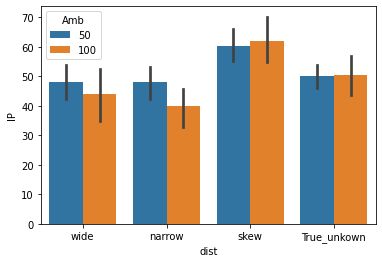

In [11]:
sns.barplot(x='dist',y='IP',hue='Amb',data=eq_df)

,Risk_per,Money,Color,Amb,RiskisLeft,response,RT,dist,sub,Choose_Risk
56,20,13,yellow,50,1,['j'],1.194775,True_unkown,sub-1248,False
57,30,13,yellow,50,1,['j'],1.276600,True_unkown,sub-1248,False
58,40,13,yellow,50,0,['j'],1.607904,True_unkown,sub-1248,True
59,50,13,yellow,50,1,['j'],2.090046,True_unkown,sub-1248,False
60,60,13,yellow,50,1,['f'],1.884085,True_unkown,sub-1248,True
61,70,13,yellow,50,1,['f'],3.973065,True_unkown,sub-1248,True
62,80,13,yellow,50,1,['f'],1.938218,True_unkown,sub-1248,True
63,90,13,yellow,50,0,['j'],1.208685,True_unkown,sub-1248,True


True_unkown 50 sub-1248


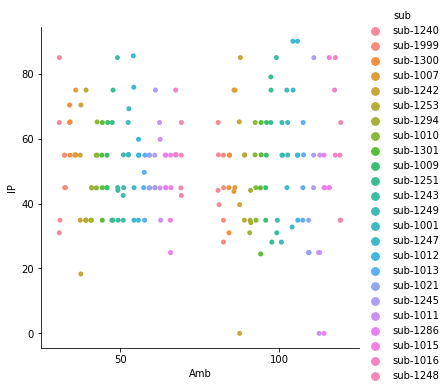

In [12]:
display(df_reg)
print(dist,amb,sub)
sns.catplot(x='Amb',y='IP',hue='sub',dodge=True,data=eq_df)

Reduce Df by distribution run model seperatly to find effect of Amb

In [35]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.genmod.bayes_mixed_glm
from pymer4.models import Lmer

print("Narrow vs Wide At 100")

mod_df=df_a[(df_a['dist'].isin(['narrow','wide']))&(df_a['Amb']==100)]
model = Lmer("Choose_Risk ~dist*Risk_per+(1|sub)", data=mod_df)
display(model.fit())

print("Narrow: 50vs100")
mod_df=df_a[(df_a['dist'].isin(['narrow']))&(df_a['Amb'].isin([50,100]))]
model = Lmer("Choose_Risk ~Amb*Risk_per+(1|sub)", data=mod_df)
display(model.fit())

print("Wide: 50vs100")
mod_df=df_a[(df_a['dist'].isin(['wide']))&(df_a['Amb'].isin([50,100]))]
model = Lmer("Choose_Risk ~Amb*Risk_per+(Amb|sub)+(1|sub)", data=mod_df)
display(model.fit())

print("Skew: 50vs100")
mod_df=df_a[(df_a['dist'].isin(['skew']))&(df_a['Amb'].isin([50,100]))]
model = Lmer("Choose_Risk ~Amb*Risk_per+(1|sub)", data=mod_df)
display(model.fit())


print("Narrow vs Wide At 50 vs 100")

mod_df=df_a[(df_a['dist'].isin(['narrow','wide']))&(df_a['Amb'].isin([50,100]))]
model = Lmer("Choose_Risk ~dist*Amb+(Risk_per|sub)+(1|sub)", data=mod_df)
display(model.fit())


#mode_df=df_a[df_a['Amb']==100]
#model = sm.GLM.from_formula("Choose_Risk ~ Risk_per+dist",family=sm.families.Binomial(), data=mod_df)
#res=model.fit()
#res.summary()


Narrow vs Wide At 100
Formula: Choose_Risk~dist*Risk_per+(1|sub)

Family: gaussian	 Inference: parametric

Number of observations: 368	 Groups: {'sub': 24.0}

Log-likelihood: -188.232 	 AIC: 376.464

Random effects:

                 Name    Var    Std
sub       (Intercept)  0.011  0.104
Residual               0.143  0.378

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),-0.112,-0.260,0.037,0.076,324.540,-1.478,0.140,
distwide,0.332,0.123,0.542,0.107,342.388,3.105,0.002,**
Risk_per,0.013,0.011,0.016,0.001,341.770,10.836,0.000,***
distwide:Risk_per,-0.004,-0.008,-0.001,0.002,342.017,-2.366,0.019,*


Narrow: 50vs100
Formula: Choose_Risk~Amb*Risk_per+(1|sub)

Family: gaussian	 Inference: parametric

Number of observations: 379	 Groups: {'sub': 24.0}

Log-likelihood: -171.507 	 AIC: 343.015

Random effects:

                 Name    Var    Std
sub       (Intercept)  0.015  0.121
Residual               0.120  0.346

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),-0.398,-0.689,-0.107,0.148,372.637,-2.683,0.008,**
Amb,0.003,-0.001,0.007,0.002,352.352,1.535,0.126,
Risk_per,0.018,0.013,0.022,0.002,352.171,7.112,0.000,***
Amb:Risk_per,-0.000,-0.000,0.000,0.000,352.262,-1.383,0.168,


Wide: 50vs100
unable to evaluate scaled gradient 

Model failed to converge: degenerate  Hessian with 1 negative eigenvalues 

Formula: Choose_Risk~Amb*Risk_per+(Amb|sub)+(1|sub)

Family: gaussian	 Inference: parametric

Number of observations: 366	 Groups: {'sub': 24.0}

Log-likelihood: -166.860 	 AIC: 333.721

Random effects:

                 Name    Var    Std
sub       (Intercept)  0.039  0.198
sub               Amb  0.000  0.003
sub.1     (Intercept)  0.017  0.132
Residual               0.115  0.339

             IV1  IV2   Corr
sub  (Intercept)  Amb -0.998

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),-0.786,-1.093,-0.478,0.157,232.448,-5.009,0.0,***
Amb,0.010,0.006,0.014,0.002,231.925,4.996,0.0,***
Risk_per,0.023,0.018,0.027,0.002,319.517,9.074,0.0,***
Amb:Risk_per,-0.000,-0.000,-0.000,0.000,320.097,-4.258,0.0,***


Skew: 50vs100
Formula: Choose_Risk~Amb*Risk_per+(1|sub)

Family: gaussian	 Inference: parametric

Number of observations: 382	 Groups: {'sub': 24.0}

Log-likelihood: -170.375 	 AIC: 340.751

Random effects:

                 Name    Var    Std
sub       (Intercept)  0.021  0.144
Residual               0.117  0.342

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),-0.485,-0.773,-0.197,0.147,377.734,-3.306,0.001,**
Amb,0.002,-0.002,0.005,0.002,355.032,0.862,0.389,
Risk_per,0.018,0.013,0.023,0.002,355.065,7.361,0.000,***
Amb:Risk_per,-0.000,-0.000,0.000,0.000,355.032,-1.621,0.106,


Narrow vs Wide At 50 vs 100
boundary (singular) fit: see ?isSingular 

Formula: Choose_Risk~dist*Amb+(Risk_per|sub)+(1|sub)

Family: gaussian	 Inference: parametric

Number of observations: 745	 Groups: {'sub': 24.0}

Log-likelihood: -361.858 	 AIC: 723.716

Random effects:

                 Name    Var    Std
sub       (Intercept)  0.651  0.807
sub          Risk_per  0.000  0.012
sub.1     (Intercept)  0.007  0.084
Residual               0.130  0.361

             IV1       IV2  Corr
sub  (Intercept)  Risk_per  -1.0

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.704,0.584,0.824,0.061,522.570,11.485,0.000,***
distwide,-0.097,-0.261,0.066,0.083,692.365,-1.167,0.244,
Amb,0.001,-0.001,0.002,0.001,692.297,0.705,0.481,
distwide:Amb,0.002,-0.000,0.004,0.001,692.373,1.788,0.074,.


In [37]:
print("Narrow vs Wide At 100")

mod_df=df_a[(df_a['dist'].isin(['narrow','wide']))&(df_a['Amb'].isin([50,100]))]

model = Lmer("Choose_Risk ~dist*Amb+Risk_per+(1|sub)", data=mod_df)

display(model.fit(factors={"dist": ["narrow", "wide"], "Amb": ["50", "100"]},
    ordered=True,
    summarize=False,
))
display(model.summary())

marginal_estimates, comparisons = model.post_hoc(
    marginal_vars="dist", grouping_vars=["Amb"], p_adjust="fdr"
)

# Pairwise comparisons
print(comparisons)
marginal_estimates, comparisons = model.post_hoc(
    marginal_vars="Amb", grouping_vars=["dist"], p_adjust="fdr"
)

# Pairwise comparisons
print(comparisons)

marginal_estimates, comparisons = model.post_hoc(
    marginal_vars=["dist", "Amb"], p_adjust="fdr"
)

# Pairwise comparisons
print(comparisons)

Narrow vs Wide At 100


None

Formula: Choose_Risk~dist*Amb+Risk_per+(1|sub)

Family: gaussian	 Inference: parametric

Number of observations: 745	 Groups: {'sub': 24.0}

Log-likelihood: -325.936 	 AIC: 651.873

Random effects:

                 Name   Var    Std
sub       (Intercept)  0.01  0.098
Residual               0.13  0.360

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),-0.114,-0.193,-0.035,0.040,168.492,-2.832,0.005,**
dist1,0.032,-0.004,0.069,0.019,717.262,1.729,0.084,.
Amb1,0.051,0.015,0.088,0.019,717.339,2.746,0.006,**
Risk_per,0.013,0.012,0.015,0.001,718.440,22.906,0.000,***
dist1:Amb1,0.048,-0.004,0.100,0.026,717.230,1.818,0.070,.


P-values adjusted by fdr method for 1 comparisons
        Contrast  Amb  Estimate  2.5_ci  97.5_ci     SE       DF  T-stat  \
0  narrow - wide   50     0.002  -0.071    0.075  0.037  717.176   0.063   
1  narrow - wide  100    -0.094  -0.167   -0.020  0.038  717.315  -2.493   

   P-val Sig  
0  0.950      
1  0.013   *  
P-values adjusted by fdr method for 1 comparisons
   Contrast    dist  Estimate  2.5_ci  97.5_ci     SE       DF  T-stat  P-val  \
0  50 - 100  narrow    -0.025  -0.097    0.048  0.037  717.125  -0.663  0.508   
1  50 - 100    wide    -0.120  -0.194   -0.047  0.038  717.439  -3.198  0.001   

  Sig  
0      
1  **  
P-values adjusted by fdr method for 6 comparisons
                 Contrast  Estimate  2.5_ci  97.5_ci     SE       DF  T-stat  \
0     narrow 50 - wide 50     0.002  -0.096    0.100  0.037  717.176   0.063   
1  narrow 50 - narrow 100    -0.025  -0.122    0.073  0.037  717.125  -0.663   
2    narrow 50 - wide 100    -0.118  -0.217   -0.019  0.037  717.278

In [15]:
mod_df=df_a
model = Lmer("Choose_Risk ~ dist*Amb*Risk_per+(1|sub)", data=mod_df)
display(model.fit())

Formula: Choose_Risk~dist*Amb*Risk_per+(1|sub)

Family: gaussian	 Inference: parametric

Number of observations: 1507	 Groups: {'sub': 24.0}

Log-likelihood: -686.083 	 AIC: 1372.166

Random effects:

                 Name    Var    Std
sub       (Intercept)  0.005  0.071
Residual               0.126  0.355

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),-0.396,-0.691,-0.100,0.151,1490.448,-2.623,0.009,**
distskew,-0.089,-0.505,0.326,0.212,1467.968,-0.421,0.674,
distTrue_unkown,-0.065,-0.480,0.351,0.212,1467.976,-0.304,0.761,
distwide,-0.380,-0.804,0.044,0.216,1468.470,-1.755,0.079,.
Amb,0.003,-0.001,0.007,0.002,1468.162,1.473,0.141,
Risk_per,0.017,0.013,0.022,0.003,1468.014,6.917,0.000,***
distskew:Amb,-0.001,-0.007,0.004,0.003,1468.042,-0.464,0.643,
distTrue_unkown:Amb,-0.001,-0.006,0.005,0.003,1468.047,-0.251,0.802,
distwide:Amb,0.007,0.002,0.013,0.003,1468.686,2.587,0.010,**
distskew:Risk_per,0.000,-0.007,0.007,0.004,1467.953,0.097,0.923,


In [16]:
mod_df['Choose_Risk']=pd.to_numeric(mod_df['Choose_Risk'])

model = sm.GLM.from_formula("Choose_Risk ~ Risk_per+Amb",family=sm.families.Binomial(), data=mod_df)

#random = {"a": '0 + C(sub)', "b": '0 + C(sub)*Risk_per'}                   
#model = statsmodels.genmod.bayes_mixed_glm.BinomialBayesMixedGLM.from_formula('Choose_Risk ~ dist',random, data=mod_df)

#result = model.fit_vb()

#mdf = md.fit(method=["lbfgs"])

result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              Generalized Linear Model Regression Results                              
=======================================================================================================
Dep. Variable:     ['Choose_Risk[False]', 'Choose_Risk[True]']   No. Observations:                 1507
Model:                                                     GLM   Df Residuals:                     1504
Model Family:                                         Binomial   Df Model:                            2
Link Function:                                           logit   Scale:                          1.0000
Method:                                                   IRLS   Log-Likelihood:                -653.93
Date:                                         Thu, 12 Aug 2021   Deviance:                       1307.9
Time:                                                 17:06:28   Pearson chi2:                 1.49e+03
No. Iterations:                                              5                                         
Covariance Type:                                     nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5084      0.309     14.597      0.000       3.903       5.114
Risk_per      -0.0846      0.004    -20.674      0.000      -0.093      -0.077
Amb           -0.0033      0.003     -1.204      0.229      -0.009       0.002
==============================================================================
"""

In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression

eq_df=[]

for sub in df_a['sub'].unique():
    for amb in df_a['Amb'].unique():
        for dist in ['wide','narrow','skew','True_unkown']:#df_a['dist'].unique():
            df_reg=df_a[(df_a['sub']==sub)&(df_a['Amb']==amb)&(df_a['dist']==dist)]
            X=np.array(df_reg['Risk_per']).reshape(-1,1)
            y=df_reg['Choose_Risk']
            if all(y):
                clf.intercept_=100
                clf.coef_=1
            elif all(y==False):
                clf.intercept_= -1000
                clf.coef_=1
            else:
                clf = sm.GLM.from_formula("Choose_Risk ~ Risk_per",
                            family=sm.families.Binomial(), data=eq_df).fit()
                eq_df.append([sub,amb,dist,clf.intercept_[0],clf.coef_[0][0]])

eq_df=pd.DataFrame(data=eq_df,columns=['sub','Amb','dist','intercept','coef'])

eq_df['IP']=0-np.divide(eq_df['intercept'],eq_df['coef'])
eq_df['IP'].values[eq_df['IP'].values > 100] = 80
eq_df['IP'].values[eq_df['IP'].values < 0] = 20

In [17]:
clf.summary()

AttributeError: 'LogisticRegression' object has no attribute 'summary'

In [ ]:
print(clf.coef_[0][0])
print(clf.intercept_[0])
-.7/.03

In [ ]:
data_dir=os.path.abspath("../data/")
sub="sub-1001"
sub_dir=data_dir+"/"+sub

events=[]
for root, dirs, files in os.walk(sub_dir):
    for f in files:
        if f.endswith("events.csv"):
            events.append(os.path.join(root,f))
display(events)

In [ ]:
df_a=pd.read_csv(events[0])
df_r=pd.read_csv(events[1])
df_r['choose_lot']=np.logical_or((np.logical_and(df_r.LotisLeft==1,df_r.response=="['f']")),
(np.logical_and(df_r.LotisLeft==0,df_r.response=="['J']")))
                    
display(df_r.head())
df_a['choose_risk']=np.logical_and(df_a.RiskisLeft==1,df_a.response=="['f']")

display(df_a.head())

In [ ]:
import matplotlib.pyplot as plt
plotData=df_a[df_a['Amb']==100]
sns.lmplot(x='Risk_per',y='choose_risk', data=plotData,logistic=True,x_jitter=0.5,y_jitter=0.3)
plt.plot([0,80], [0.5,0.5], linewidth=2,linestyle='dashed')

In [ ]:
import matplotlib.pyplot as plt
plotData=df_r
sns.lmplot(x='Lot_per',y='choose_lot', data=plotData ,hue='dist',logistic=True,x_jitter=0.5,y_jitter=0.3)
plt.plot([0,80], [0.5,0.5], linewidth=2,linestyle='dashed')

ERROR! Session/line number was not unique in database. History logging moved to new session 361
